# Classification of breast cancer data

You will implement a Support Vector Machine (SVM) model for the classification of breast cancer data and compare its performance with K-nearest Neighbors.

#### Loading the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
## loading the raw data using pandas
bc=pd.read_csv("data.csv")
bc.drop(columns=['Unnamed: 32'],inplace=True)
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Pre-process and understand data

The data label is the diagnosis (M = malignant, B = benign).

Convert diagnosis column to binary 0-1 label where 1 incidates malignancy.

In [3]:
## convert diagnosis to numerical label (M = malignant, B = benign)
y= pd.DataFrame([1 if d=="M" else 0 for d in bc['diagnosis']])
y.head() # response variable

,0
0,1
1,1
2,1
3,1
4,1


**Question:** Plot the first 2 features against diagnosis. Is the data linearly separable and what happens if we fit a hard-margin SVM to the data?

**Answer:** No the data is linearly seperable, the hard margin will not be able to classify the data because it can only work for near linearly seperable data. The hard margin SVM will still have data points not being classified properly and margins without any mis classifications wont be possible in this case. So hard margin will not work in this case.

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

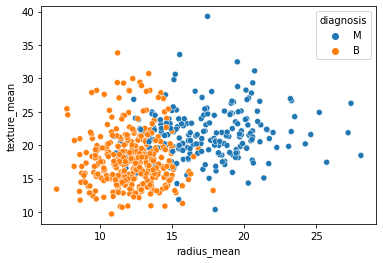

In [4]:
sns.scatterplot(x=bc['radius_mean'],y=bc['texture_mean'],hue=bc['diagnosis'])


#### Splitting the data: training and test 

In [5]:
from sklearn.model_selection import train_test_split

columns=[c for c in bc.columns if (c!='diagnosis' and c!='id')]

X = bc[columns]

X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.25, random_state=0)

## 1. Support Vector Machine (SVM)

 Train and test a SVM model with the following requirements:
- Use GridSearchCV to find the best combination of model hyper-parameters: kernel: {linear, rbf}; for both kernel, C:{1, 10, 100, 1000}; for rbf kernel 'gamma' = {1e-3, 1e-4, 1e-5}.
- Try both accuracy and recall metric as scoring function in GridSearchCV
- Report the best hyper-parameter setting for each metric
- Report and plot the confusion matrix of the best estimator for each metric

# Tuning hyper-parameters for accuracy
{'C': 100, 'kernel': 'linear'}


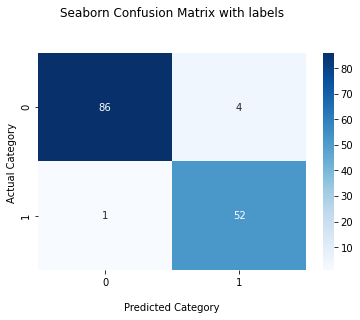

# Tuning hyper-parameters for recall
{'C': 100, 'kernel': 'linear'}


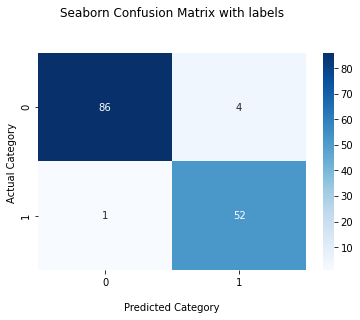

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

svc=SVC()

svcAorR={'accuracy':SVC(),'recall':SVC()}

param_grid = [
    {'kernel':['linear'],'C':[1,10,100,1000]},
    {'kernel':['rbf'], 'C':[1,10,100,1000], 'gamma':[1e-3,1e-4,1e-5]}
]
scores = ['accuracy','recall']
for sc in scores:
    grid= GridSearchCV(svc,param_grid=param_grid,scoring=sc,n_jobs=-1,cv=5)
    print("# Tuning hyper-parameters for %s" % sc)
    grid.fit(X_train,y_train)
    
    #svc = SVC(grid.best_params_).fit(X_train,y_train)
    svc = grid.best_estimator_
    print(grid.best_params_)
    
    y_pred_svc =svc.predict(X_test)
    ## computing and plotting confusion matrix
    cf = confusion_matrix(y_test,y_pred_svc)
    

    ax = sns.heatmap(cf, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ')
    ## Ticket labels - List must be in alphabetical order
    ##ax.xaxis.set_ticklabels(['Malignant','Benign'])
    ##ax.yaxis.set_ticklabels(['Malignant','Benign'])
    plt.show()

** Fit an SVM model to a slice of data that contains only the first 2 features and visualize decision boudary based on these two features.

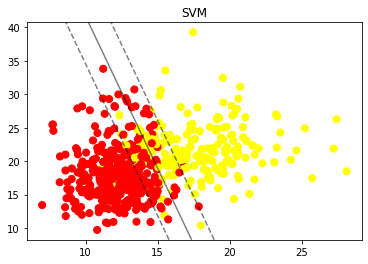

In [7]:
from sklearn import metrics

## for display purposes, we fit the model on the first two features
svc.fit(X_train[['radius_mean','texture_mean']],y_train)

## Plotting the decision boundary for all data (both train and test)
def plot_svc_decision_function(model, ax=None, plot_support=True):    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=3, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svc)
plt.title('SVM')
plt.show()

### 2. K-nearest Neighbors classifier

**Question:** Repeat all the tasks for SVM to train a kNN classifier where the hyper-parameter is only k (number of neighbors) ranging from 1 to 50 in kNN. Compare the results with those of SVM, which classifier gives better results?

# Tuning hyper-parameters for accuracy
{'n_neighbors': 13}


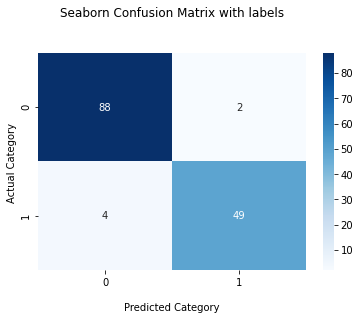

# Tuning hyper-parameters for recall
{'n_neighbors': 9}


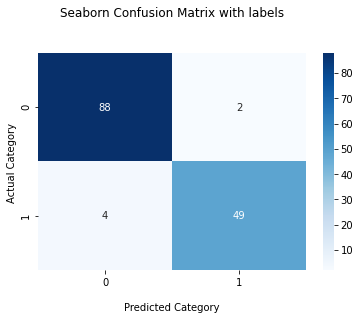

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier()



k_range=np.arange(1,51,1)
param_grid=dict(n_neighbors=k_range)
scores = ['accuracy','recall']
for sc in scores:
    grid_knn= GridSearchCV(knn,param_grid=param_grid,scoring=sc,cv=5,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_knn.fit(X_train,y_train)
    
    knn = grid_knn.best_estimator_
    print(grid_knn.best_params_)
    y_pred_knn =knn.predict(X_test)
    ## computing and plotting confusion matrix
    cf = confusion_matrix(y_test,y_pred_knn)
    

    ax = sns.heatmap(cf, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Category')
    ax.set_ylabel('Actual Category ')
    ## Ticket labels - List must be in alphabetical order
    #ax.xaxis.set_ticklabels(['Malignant','Benign'])
    #ax.yaxis.set_ticklabels(['Malignant','Benign'])
    plt.show()


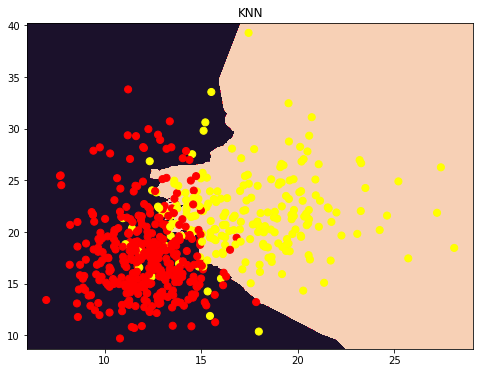

In [9]:
knn.fit(X_train.iloc[:,0:2], y_train)

## Plotting the decision boundary for all data (both train and test)

h=0.02

    
    
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='rocket')

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    


plt.title('KNN')
plt.show()

Since we are trying to classify the severity of breast cancer it is important that we reduce false negatives i.e. predicting a breast cancer as benign instead malignant will have a far greater impact than predicting a false positive. With this in mind we can see that KNN is predicting 4 false negatives in comparison to SVM which is predicting only 1 false negative. So from this we can infer that SVM is a better model than KNN.